**STEP-1 IMPORTED LIBRARIES**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import time

import warnings 
warnings.filterwarnings('ignore')
import networkx as nx
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
from mlxtend.preprocessing import TransactionEncoder

**STEP-2 LOAD AND CLEAN DATA**

In [2]:
df = pd.read_csv("bread basket.csv")

In [8]:
df.duplicated().sum()

1620

In [3]:
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [42]:
df.sample(10)

,Transaction,Item,date_time,period_day,weekday_weekend
14059,6815,Bread,18-02-2017 15:18,afternoon,weekend
18185,8637,Bread,23-03-2017 13:16,afternoon,weekday
19415,9188,Coffee,01-04-2017 11:27,morning,weekend
4913,2435,Bread,02-12-2016 09:59,morning,weekday
1981,962,Pastry,10-11-2016 10:58,morning,weekday
15744,7520,Hot chocolate,04-03-2017 09:07,morning,weekend
514,251,Medialuna,01-11-2016 16:26,afternoon,weekday
16010,7622,Coffee,05-03-2017 10:53,morning,weekend
4696,2310,Coke,29-11-2016 15:44,afternoon,weekday
18208,8644,Coffee,23-03-2017 14:06,afternoon,weekday


In [5]:
print(df.describe())

        Transaction
count  20507.000000
mean    4976.202370
std     2796.203001
min        1.000000
25%     2552.000000
50%     5137.000000
75%     7357.000000
max     9684.000000


In [6]:
df.isnull().sum()

Transaction        0
Item               0
date_time          0
period_day         0
weekday_weekend    0
dtype: int64

In [7]:
df.shape

(20507, 5)

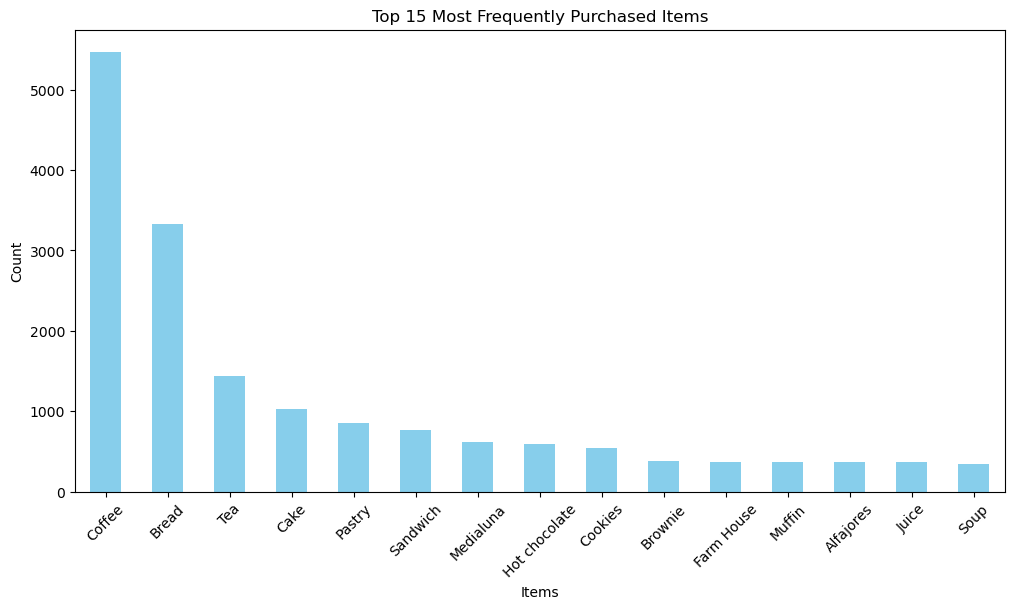

Most Frequent Item:
 Item
Coffee    5471
Bread     3325
Tea       1435
Name: count, dtype: int64
Least Frequent Item:
 Item
Olum & polenta    1
Raw bars          1
Polenta           1
Name: count, dtype: int64


In [10]:
item_freq = df['Item'].value_counts()

plt.figure(figsize=(12, 6))
item_freq[:15].plot(kind='bar', color='skyblue')
plt.title("Top 15 Most Frequently Purchased Items")
plt.xlabel("Items")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

print("Most Frequent Item:\n", item_freq.head(3))
print("Least Frequent Item:\n", item_freq.tail(3))

In [11]:
basket_df = df.groupby('Transaction')['Item'].apply(list).reset_index()
basket_df.head()

,Transaction,Item
0,1,[Bread]
1,2,"[Scandinavian, Scandinavian]"
2,3,"[Hot chocolate, Jam, Cookies]"
3,4,[Muffin]
4,5,"[Coffee, Pastry, Bread]"


In [12]:
te = TransactionEncoder()
te_ary = te.fit(basket_df['Item']).transform(basket_df['Item'])
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
df_encoded.head()

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**STEP-3 ALGORITHM**

**1. APRIORI ALGORITHM**

In [13]:
# apriori algorithm
frequent_items = apriori(df_encoded, min_support=0.02, use_colnames=True)
frequent_items = frequent_items.sort_values(by="support", ascending=False)
frequent_items.head()

,support,itemsets
4,0.478394,(Coffee)
1,0.327205,(Bread)
16,0.142631,(Tea)
3,0.103856,(Cake)
20,0.090016,"(Bread, Coffee)"


In [14]:
rules = association_rules(frequent_items, metric="lift", min_threshold=1.0)
rules = rules.sort_values(by='lift', ascending=False)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
15,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,1.0,0.008959,1.075372,0.439556,0.106736,0.070090,0.197779
14,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,1.0,0.008959,1.111865,0.420538,0.106736,0.100611,0.197779
17,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,1.0,0.007593,1.764582,0.332006,0.048464,0.433293,0.376936
16,(Coffee),(Toast),0.478394,0.033597,0.023666,0.049470,1.472431,1.0,0.007593,1.016699,0.615122,0.048464,0.016424,0.376936
6,(Coffee),(Medialuna),0.478394,0.061807,0.035182,0.073542,1.189878,1.0,0.005614,1.012667,0.305936,0.069665,0.012509,0.321387


In [15]:
# Format rules with arrows: A, B → C
rules_formatted = rules.copy()
rules_formatted['Rule'] = rules_formatted['antecedents'].apply(lambda x: ', '.join(list(x))) + " → " + \
                          rules_formatted['consequents'].apply(lambda x: ', '.join(list(x)))

# Display top 5 rules with arrows
print(rules_formatted[['Rule', 'support', 'confidence', 'lift']].head())

                  Rule   support  confidence      lift
15          Tea → Cake  0.023772    0.166667  1.604781
14          Cake → Tea  0.023772    0.228891  1.604781
17      Toast → Coffee  0.023666    0.704403  1.472431
16      Coffee → Toast  0.023666    0.049470  1.472431
6   Coffee → Medialuna  0.035182    0.073542  1.189878


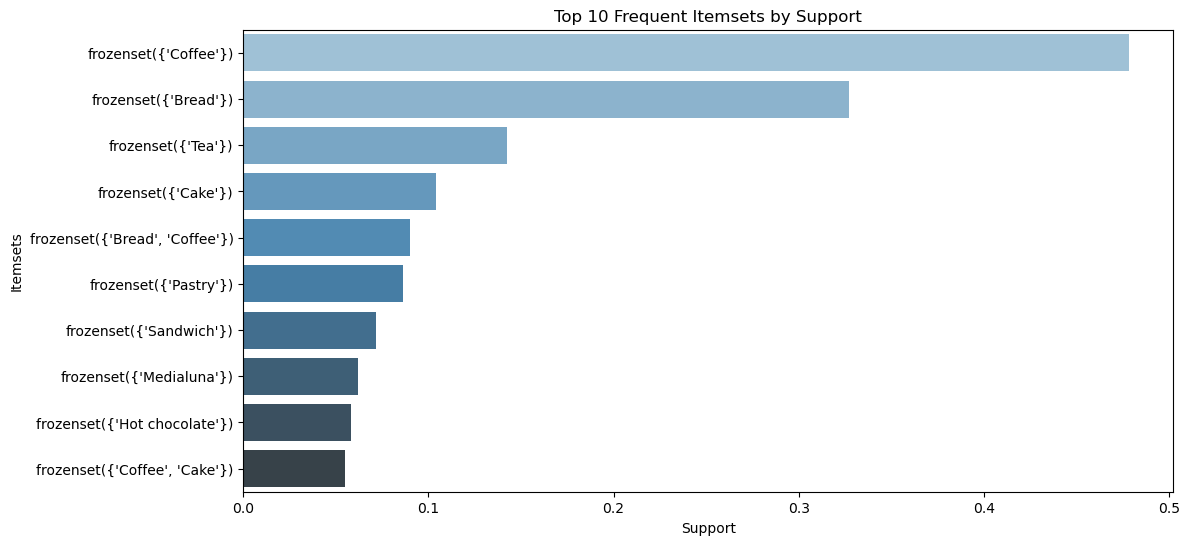

In [16]:
plt.figure(figsize=(12, 6))
sns.barplot(x='support', y='itemsets', data=frequent_items[:10], palette="Blues_d")
plt.title("Top 10 Frequent Itemsets by Support")
plt.xlabel("Support")
plt.ylabel("Itemsets")
plt.show()

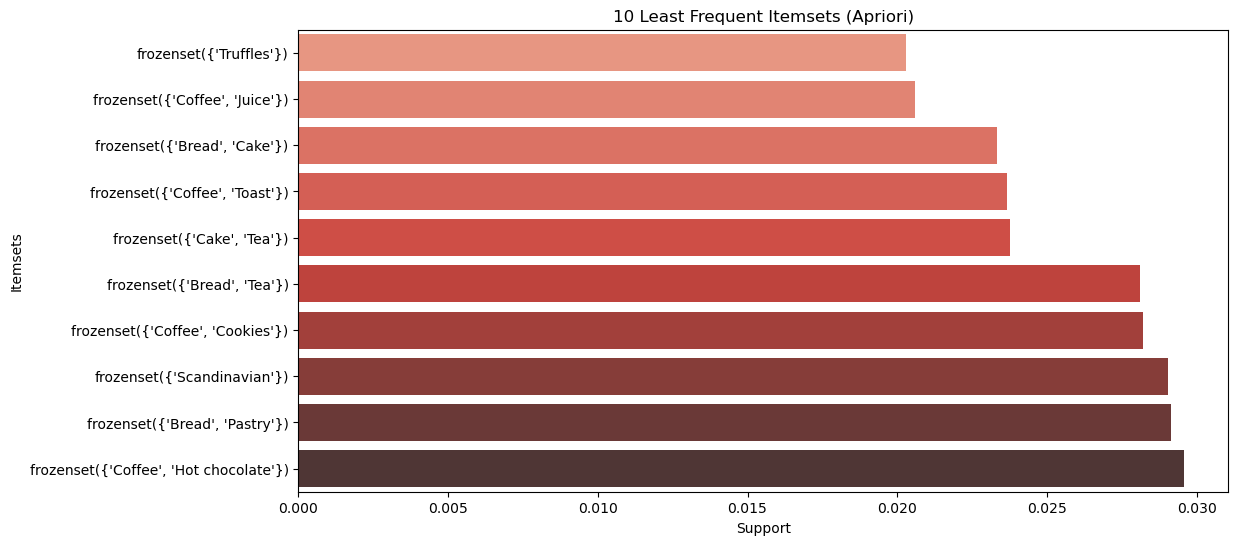

In [25]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x='support', 
    y='itemsets', 
    data=frequent_items.nsmallest(10, 'support'),
    palette="Reds_d"
)
plt.title("10 Least Frequent Itemsets (Apriori)")
plt.xlabel("Support") 
plt.ylabel("Itemsets")
plt.show()

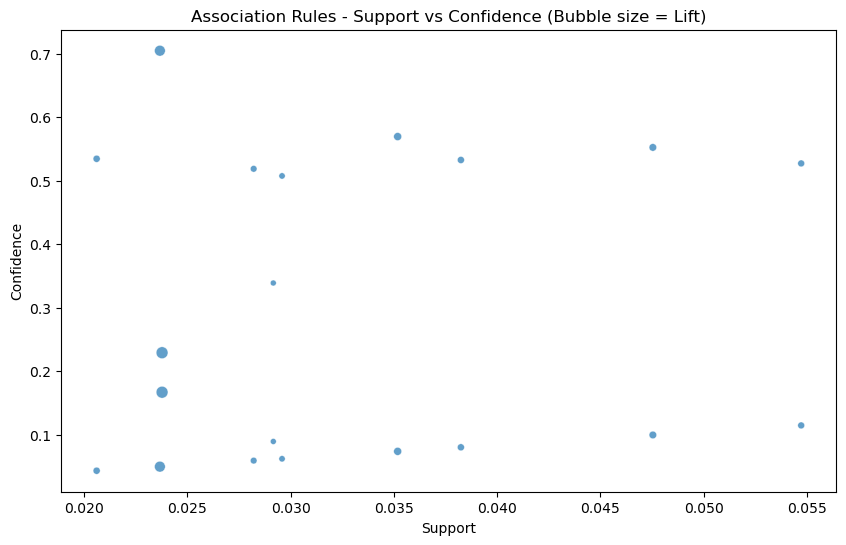

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='support', y='confidence', size='lift', data=rules, legend=False, alpha=0.7)
plt.title('Association Rules - Support vs Confidence (Bubble size = Lift)')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

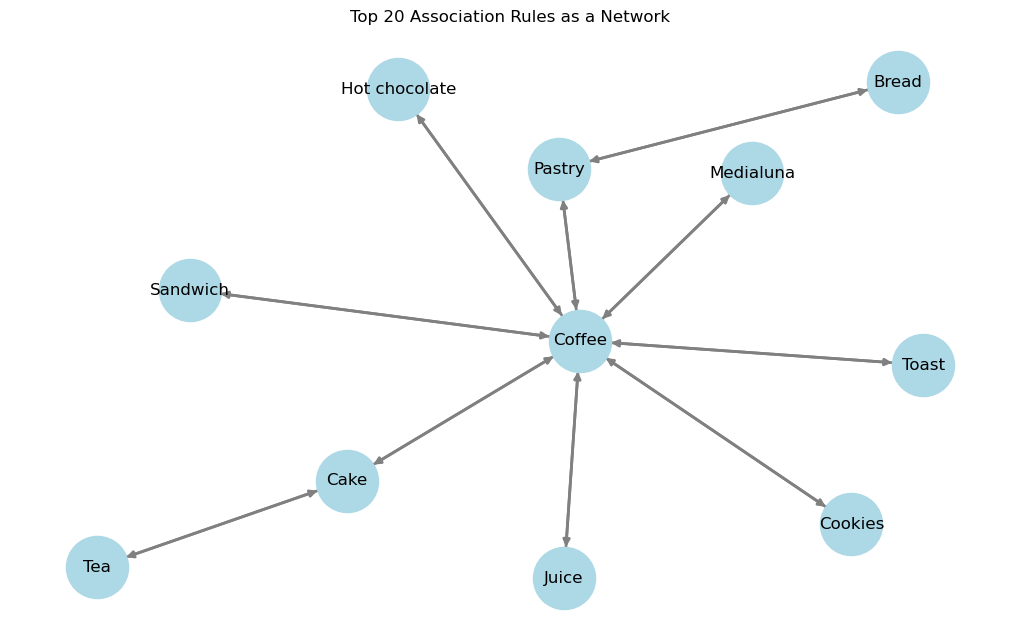

In [18]:
# Take top 20 highest lift rules
top_rules = rules.sort_values(by='lift', ascending=False).head(20)

# Create a directed graph
G = nx.DiGraph()

for _, row in top_rules.iterrows():
    for ant in row['antecedents']:
        for cons in row['consequents']:
            G.add_edge(ant, cons, weight=row['lift'])

plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, k=1)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=12, edge_color='gray', width=2)
plt.title("Top 20 Association Rules as a Network")
plt.tight_layout()
plt.show()


**2. FP-GROWTH ALGORITHIM**

In [19]:
from mlxtend.frequent_patterns import fpgrowth

# FP-Growth
frequent_fp = fpgrowth(df_encoded, min_support=0.02, use_colnames=True)
rules_fp = association_rules(frequent_fp, metric="lift", min_threshold=1.0)
rules_fp['Rule'] = rules_fp['antecedents'].apply(lambda x: ', '.join(list(x))) + " → " + \
                   rules_fp['consequents'].apply(lambda x: ', '.join(list(x)))
print(rules_fp[['Rule', 'support', 'confidence', 'lift']].head())

                     Rule   support  confidence      lift
0  Coffee → Hot chocolate  0.029583    0.061837  1.060311
1  Hot chocolate → Coffee  0.029583    0.507246  1.060311
2        Coffee → Cookies  0.028209    0.058966  1.083723
3        Cookies → Coffee  0.028209    0.518447  1.083723
4         Coffee → Pastry  0.047544    0.099382  1.154168


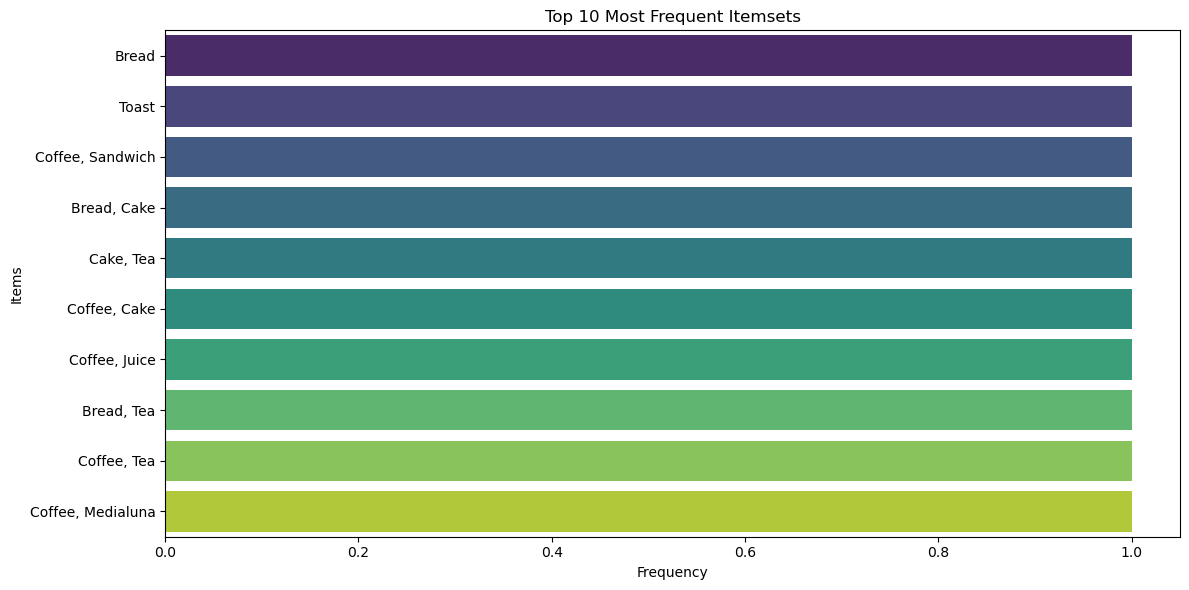

In [20]:
# Get item frequencies from frequent itemsets
item_freq = frequent_fp['itemsets'].value_counts().reset_index()
item_freq.columns = ['Items', 'Frequency']
item_freq['Items'] = item_freq['Items'].apply(lambda x: ', '.join(list(x)))

plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Items', data=item_freq.head(10), palette='viridis')
plt.title('Top 10 Most Frequent Itemsets')
plt.xlabel('Frequency')
plt.ylabel('Items')
plt.tight_layout()
plt.show()

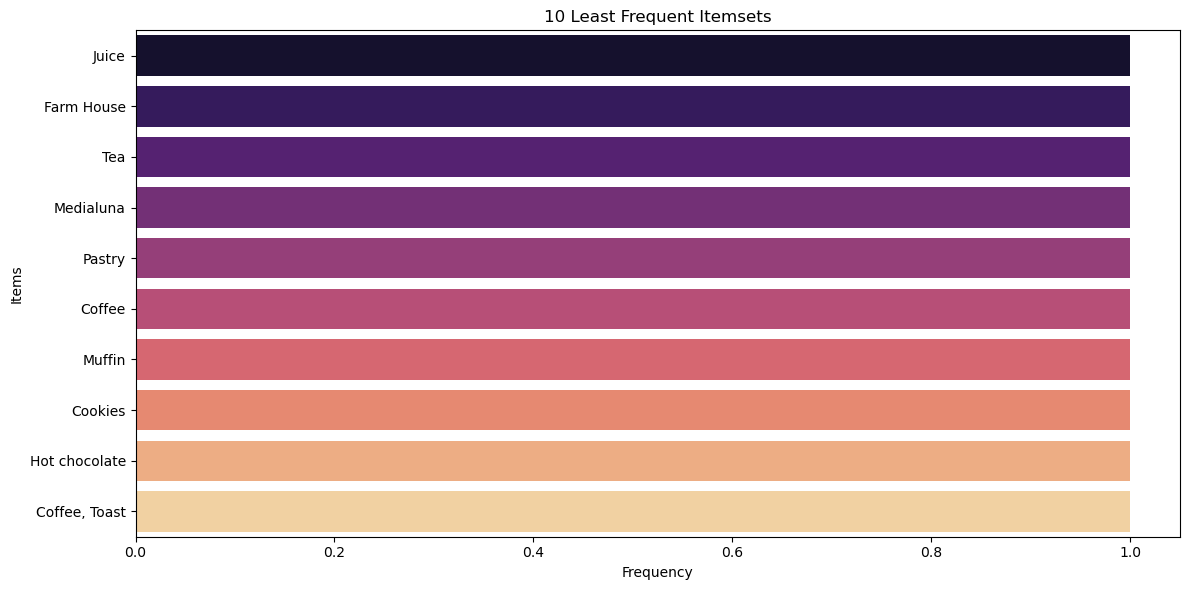

In [21]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Items', data=item_freq.tail(10), palette='magma')
plt.title('10 Least Frequent Itemsets')
plt.xlabel('Frequency')
plt.ylabel('Items')
plt.tight_layout()
plt.show()

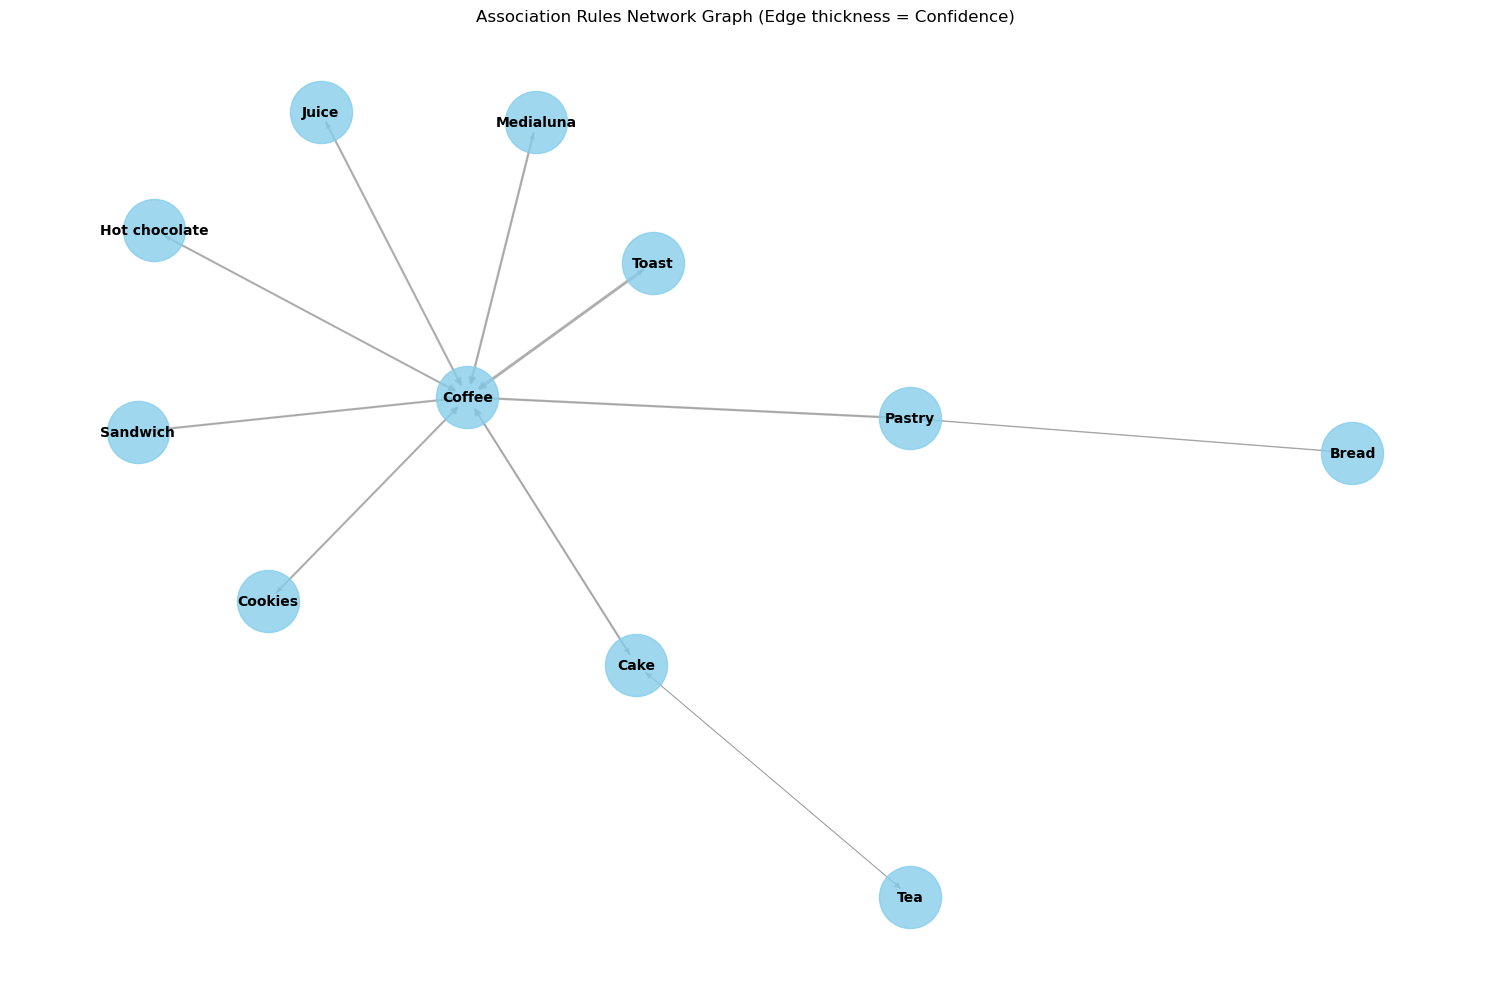

In [22]:
# Create a directed graph
G = nx.DiGraph()

# Add edges with weights based on confidence
for _, row in rules_fp.iterrows():
    antecedents = ', '.join(list(row['antecedents']))
    consequents = ', '.join(list(row['consequents']))
    G.add_edge(antecedents, consequents, weight=row['confidence'])

# Draw the graph
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G, k=0.5)
nx.draw_networkx_nodes(G, pos, node_size=2000, alpha=0.8, node_color='skyblue')
nx.draw_networkx_edges(G, pos, width=[d['weight']*3 for (u, v, d) in G.edges(data=True)], 
                      edge_color='gray', alpha=0.6)
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

plt.title('Association Rules Network Graph (Edge thickness = Confidence)')
plt.axis('off')
plt.tight_layout()
plt.show()

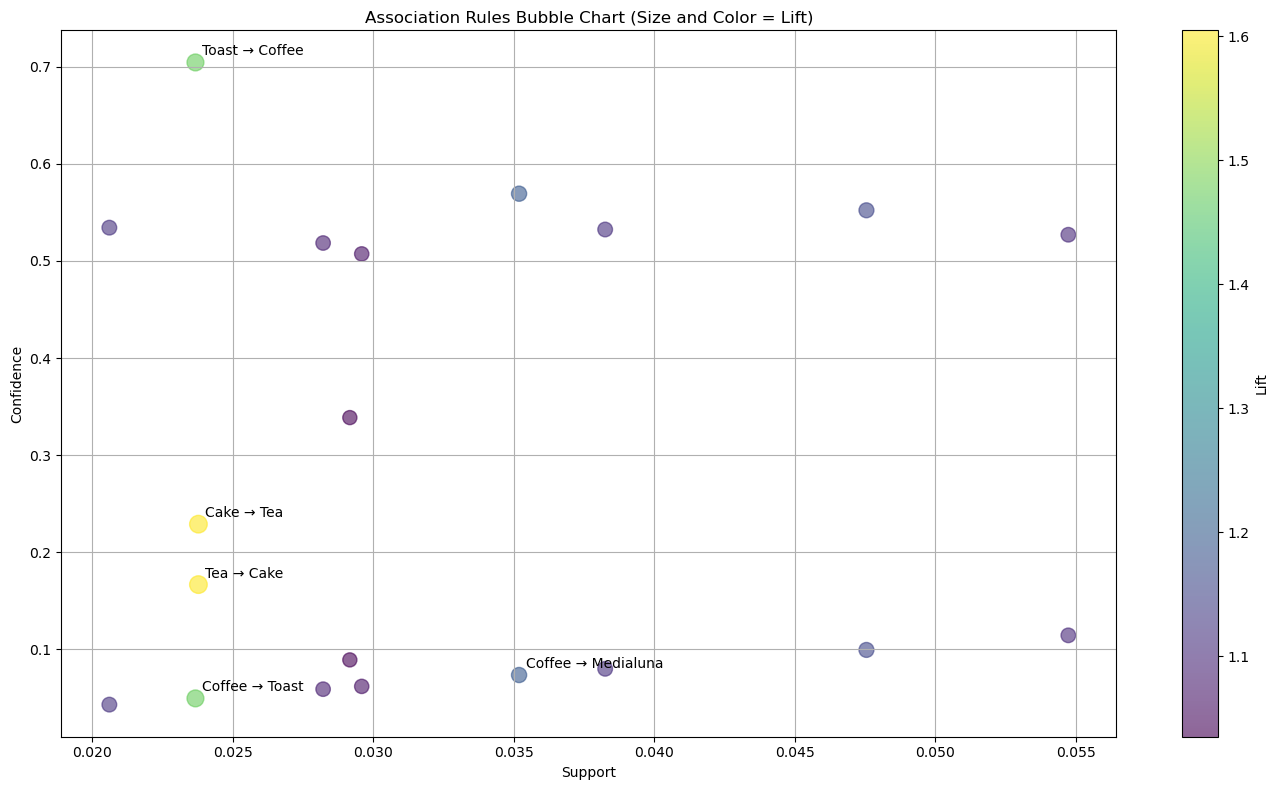

In [23]:
plt.figure(figsize=(14, 8))
scatter = plt.scatter(
    x=rules_fp['support'],
    y=rules_fp['confidence'],
    s=rules_fp['lift']*100,  # Size by lift
    c=rules_fp['lift'],      # Color by lift
    cmap='viridis',
    alpha=0.6
)

# Annotate some interesting rules
for i, row in rules_fp.nlargest(5, 'lift').iterrows():
    plt.annotate(row['Rule'], (row['support'], row['confidence']), 
                 xytext=(5,5), textcoords='offset points')

plt.colorbar(scatter, label='Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules Bubble Chart (Size and Color = Lift)')
plt.grid(True)
plt.tight_layout()
plt.show()

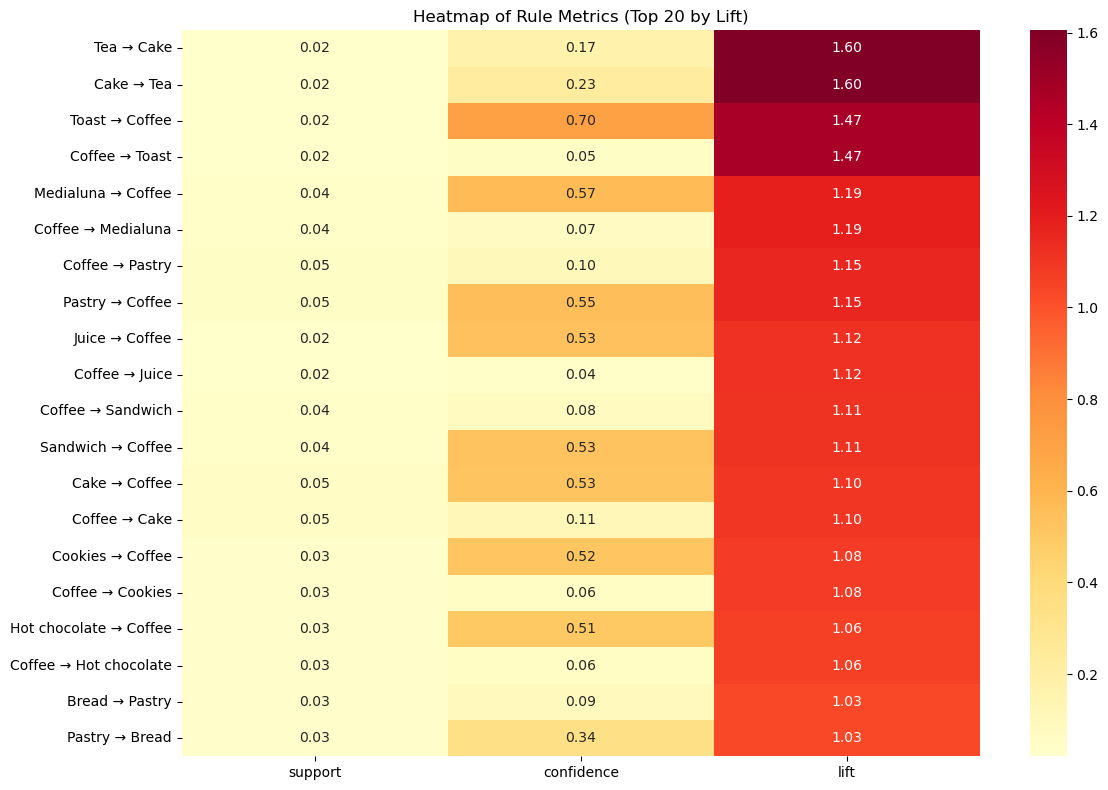

In [24]:
# Select top 20 rules for readability
top_rules = rules_fp.sort_values('lift', ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.heatmap(
    top_rules[['support', 'confidence', 'lift']],
    annot=True,
    cmap='YlOrRd',
    yticklabels=top_rules['Rule'],
    fmt='.2f'
)
plt.title('Heatmap of Rule Metrics (Top 20 by Lift)')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**3. BRUTE FORCE Algorithm**

In [26]:
from itertools import combinations

def simple_brute_force_rules(df_encoded, min_support=0.02, min_confidence=0.5):
    items = df_encoded.columns.tolist()
    n_transactions = len(df_encoded)
    rules = []
    
    # Generate all possible 2-item combinations
    for item1, item2 in combinations(items, 2):
        # Calculate support for each combination
        support_both = ((df_encoded[item1] == 1) & (df_encoded[item2] == 1)).sum() / n_transactions
        support_item1 = (df_encoded[item1] == 1).sum() / n_transactions
        support_item2 = (df_encoded[item2] == 1).sum() / n_transactions
        
        if support_both >= min_support:
            # Rule: item1 -> item2
            confidence = support_both / support_item1
            if confidence >= min_confidence:
                rules.append({
                    'rule': f"{item1} → {item2}",
                    'support': support_both,
                    'confidence': confidence,
                    'lift': confidence / support_item2
                })
            
            # Rule: item2 -> item1
            confidence = support_both / support_item2
            if confidence >= min_confidence:
                rules.append({
                    'rule': f"{item2} → {item1}",
                    'support': support_both,
                    'confidence': confidence,
                    'lift': confidence / support_item1
                })
    
    return pd.DataFrame(rules).sort_values('lift', ascending=False)

# Usage
rules_df = simple_brute_force_rules(df_encoded)
print(rules_df.head())

                 rule   support  confidence      lift
7      Toast → Coffee  0.023666    0.704403  1.472431
4  Medialuna → Coffee  0.035182    0.569231  1.189878
5     Pastry → Coffee  0.047544    0.552147  1.154168
3      Juice → Coffee  0.020602    0.534247  1.116750
6   Sandwich → Coffee  0.038246    0.532353  1.112792


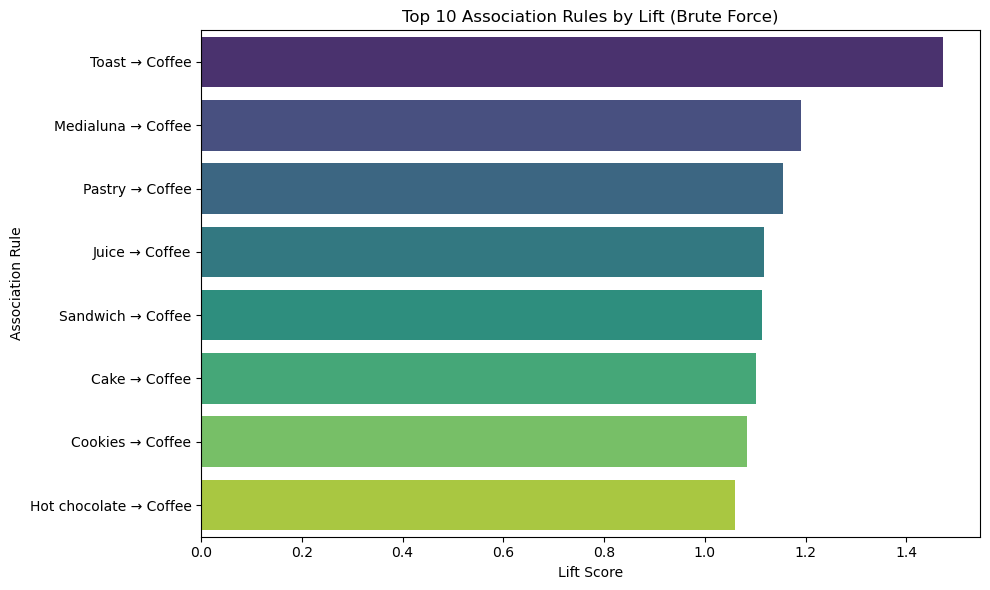

In [27]:
# Top Rules by Lift (Bar Plot)
plt.figure(figsize=(10,6))
top_rules = rules_df.sort_values('lift', ascending=False).head(10)
sns.barplot(x='lift', y='rule', data=top_rules, palette='viridis')
plt.title('Top 10 Association Rules by Lift (Brute Force)')
plt.xlabel('Lift Score')
plt.ylabel('Association Rule')
plt.tight_layout()
plt.show()

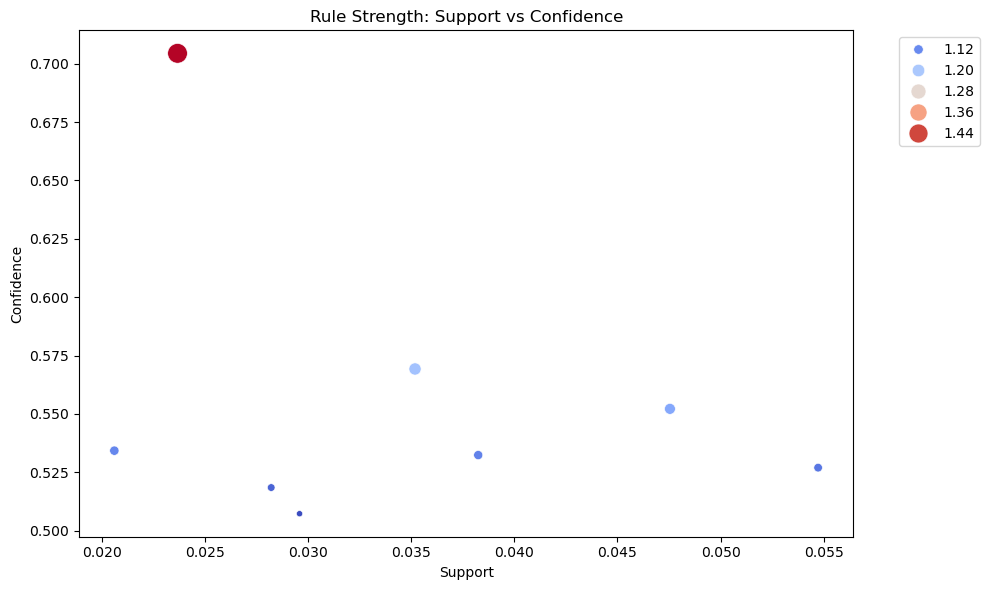

In [28]:
# Support vs Confidence (Bubble Chart)
plt.figure(figsize=(10,6))
scatter = sns.scatterplot(
    x='support', 
    y='confidence',
    size='lift',
    hue='lift',
    data=rules_df,
    sizes=(20, 200),
    palette='coolwarm'
)
plt.title('Rule Strength: Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

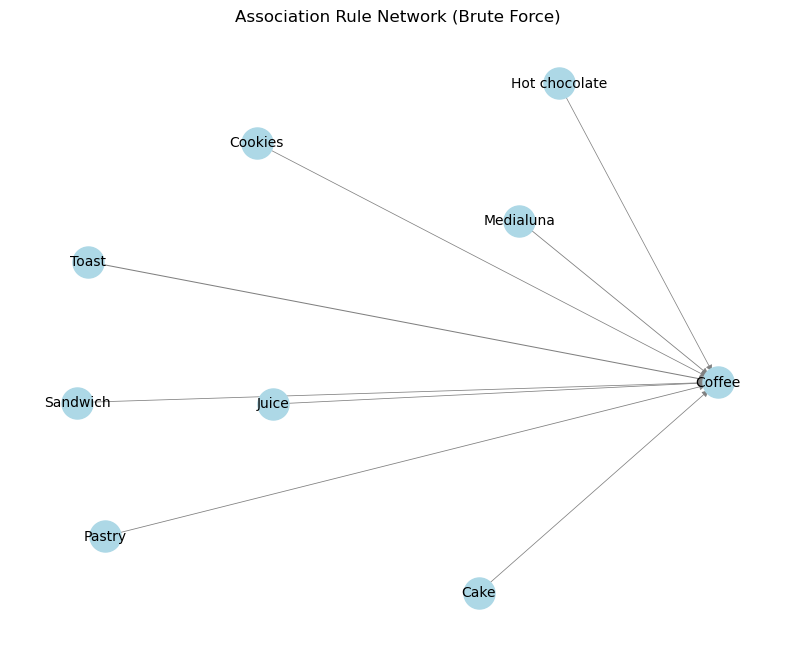

In [30]:
plt.figure(figsize=(10,8))
G = nx.DiGraph()

# Add rules as edges
for _, row in rules_df.iterrows():
    G.add_edge(row['rule'].split(' → ')[0], 
               row['rule'].split(' → ')[1],
               weight=row['lift'])

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')
nx.draw_networkx_edges(G, pos, edge_color='gray', width=[d['weight']/2 for (u,v,d) in G.edges(data=True)])
nx.draw_networkx_labels(G, pos, font_size=10)
plt.title('Association Rule Network (Brute Force)')
plt.axis('off')
plt.show()

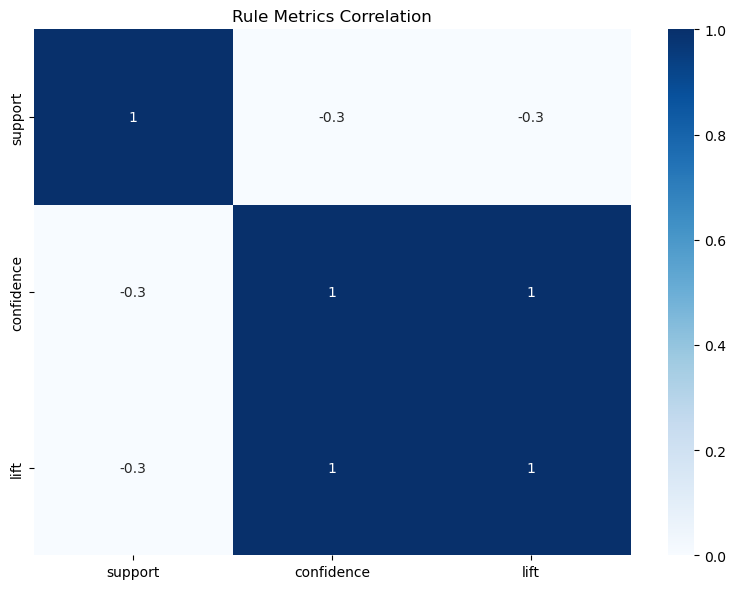

In [31]:
# 4. Combined Metrics Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(
    rules_df[['support', 'confidence', 'lift']].corr(),
    annot=True,
    cmap='Blues',
    vmin=0,
    vmax=1
)
plt.title('Rule Metrics Correlation')
plt.tight_layout()
plt.show()

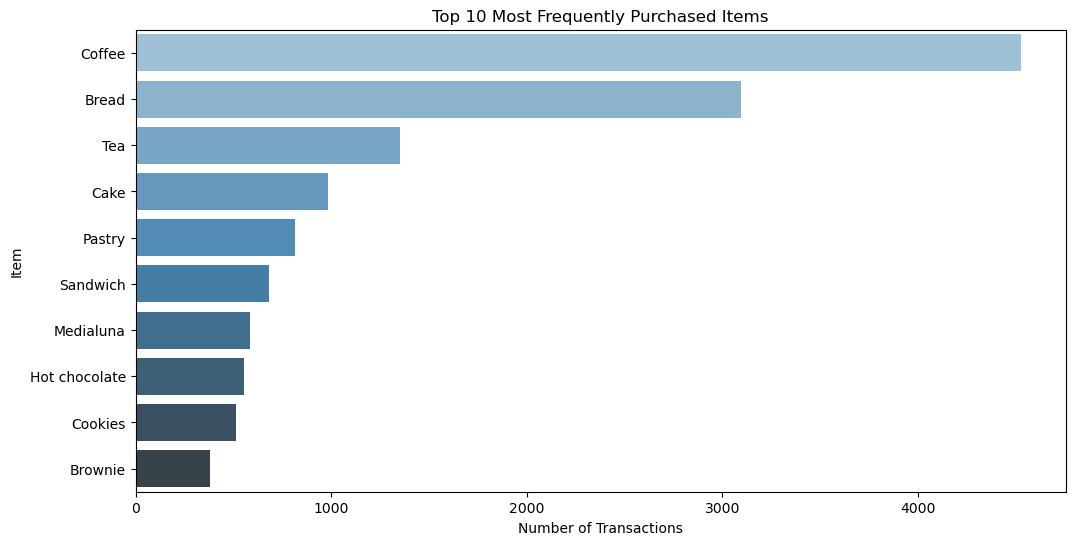

In [32]:
# Calculate item frequencies
item_freq = df_encoded.sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=item_freq.head(10).values, 
            y=item_freq.head(10).index,
            palette="Blues_d")
plt.title('Top 10 Most Frequently Purchased Items')
plt.xlabel('Number of Transactions')
plt.ylabel('Item')
plt.show()

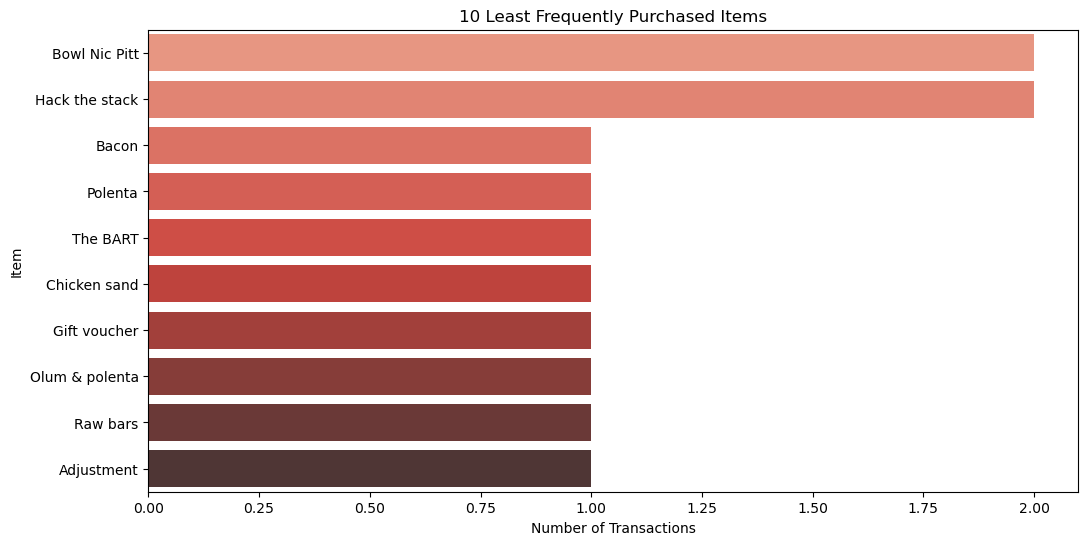

In [33]:
plt.figure(figsize=(12,6))
sns.barplot(x=item_freq.tail(10).values,
            y=item_freq.tail(10).index,
            palette="Reds_d")
plt.title('10 Least Frequently Purchased Items')
plt.xlabel('Number of Transactions')
plt.ylabel('Item')
plt.show()

<Figure size 1200x600 with 0 Axes>

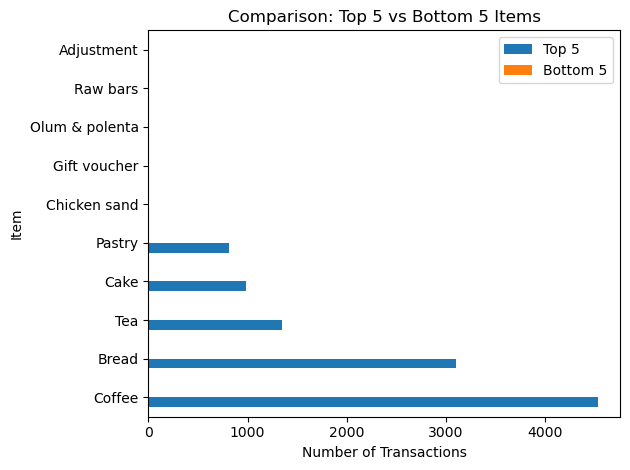

In [35]:
plt.figure(figsize=(12,6))
pd.concat([
    item_freq.head(5).rename('Top 5'),
    item_freq.tail(5).rename('Bottom 5')
], axis=1).plot(kind='barh')
plt.title('Comparison: Top 5 vs Bottom 5 Items')
plt.xlabel('Number of Transactions')
plt.ylabel('Item')
plt.tight_layout()
plt.show()

**Step-4 COMPARISON**

In [36]:
## Helper function for brute-force
def brute_force_rules(df_encoded, min_support=0.02):
    items = df_encoded.columns.tolist()
    n_transactions = len(df_encoded)
    rules = []
    
    for item1, item2 in combinations(items, 2):
        support_both = ((df_encoded[item1] == 1) & (df_encoded[item2] == 1)).sum() / n_transactions
        if support_both >= min_support:
            rules.append({'itemset': frozenset([item1, item2]), 'support': support_both})
    
    return pd.DataFrame(rules)

## Run and compare all algorithms
def compare_algorithms(df_encoded, min_support=0.02):
    results = {}
    
    # 1. Brute-Force
    start = time.time()
    brute_items = brute_force_rules(df_encoded, min_support)
    brute_time = time.time() - start
    
    # 2. Apriori
    start = time.time()
    apriori_items = apriori(df_encoded, min_support=min_support, use_colnames=True)
    apriori_time = time.time() - start
    
    # 3. FP-Growth
    start = time.time()
    fp_items = fpgrowth(df_encoded, min_support=min_support, use_colnames=True)
    fp_time = time.time() - start
    
    # Store results
    results['Brute-Force'] = {'time': brute_time, 'itemsets': len(brute_items)}
    results['Apriori'] = {'time': apriori_time, 'itemsets': len(apriori_items)}
    results['FP-Growth'] = {'time': fp_time, 'itemsets': len(fp_items)}
    
    return results

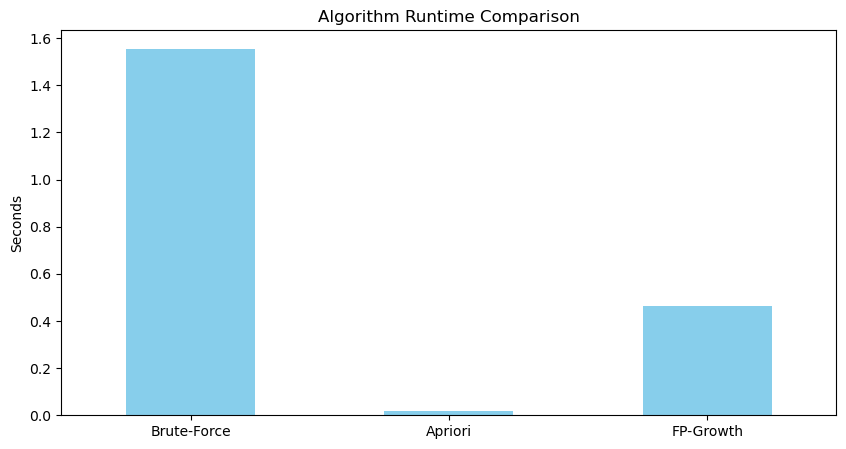

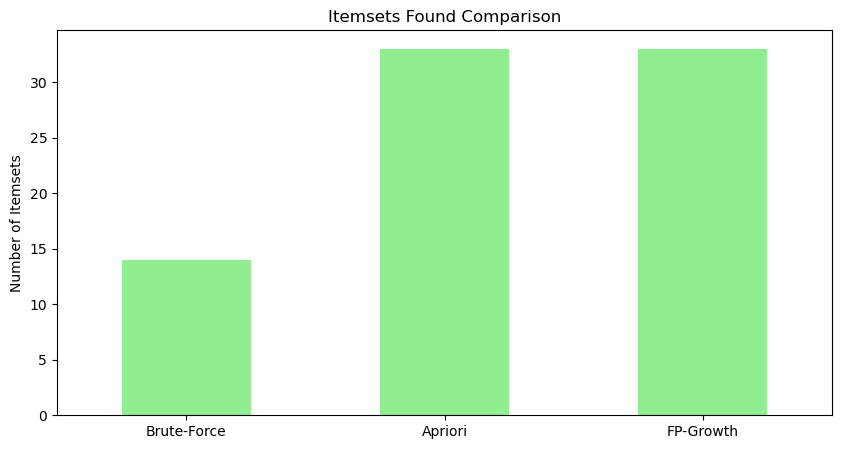

In [38]:
## Run comparison
comparison_results = compare_algorithms(df_encoded)

## Visualization
def plot_comparison(results):
    # Time comparison
    plt.figure(figsize=(10, 5))
    pd.DataFrame.from_dict(results, orient='index')['time'].plot(kind='bar', color='skyblue')
    plt.title('Algorithm Runtime Comparison')
    plt.ylabel('Seconds')
    plt.xticks(rotation=0)
    plt.show()
    
    # Itemsets found
    plt.figure(figsize=(10, 5))
    pd.DataFrame.from_dict(results, orient='index')['itemsets'].plot(kind='bar', color='lightgreen')
    plt.title('Itemsets Found Comparison')
    plt.ylabel('Number of Itemsets')
    plt.xticks(rotation=0)
    plt.show()

plot_comparison(comparison_results)

In [40]:
## Detailed Rules Comparison (optional)
def compare_rules(df_encoded, min_support=0.02, min_threshold=1.0):
    # Generate rules for each algorithm
    brute_df = brute_force_rules(df_encoded, min_support)
    apriori_df = association_rules(apriori(df_encoded, min_support=min_support, use_colnames=True), 
                                 metric="lift", min_threshold=min_threshold)
    fp_df = association_rules(fpgrowth(df_encoded, min_support=min_support, use_colnames=True),
                            metric="lift", min_threshold=min_threshold)
     # Compare rule counts
    print(f"Brute-Force found {len(brute_df)} itemsets")
    print(f"Apriori found {len(apriori_df)} rules")
    print(f"FP-Growth found {len(fp_df)} rules")
    
    # Compare some sample rules
    print("\nSample Brute-Force rules:")
    print(brute_df.head(3))
    print("\nSample Apriori rules:")
    print(apriori_df[['antecedents', 'consequents', 'support', 'lift']].head(3))
    print("\nSample FP-Growth rules:")
    print(fp_df[['antecedents', 'consequents', 'support', 'lift']].head(3))

compare_rules(df_encoded)

Brute-Force found 14 itemsets
Apriori found 20 rules
FP-Growth found 20 rules

Sample Brute-Force rules:
           itemset   support
0    (Bread, Cake)  0.023349
1  (Bread, Coffee)  0.090016
2  (Bread, Pastry)  0.029160

Sample Apriori rules:
  antecedents consequents   support      lift
0     (Bread)    (Pastry)  0.029160  1.034977
1    (Pastry)     (Bread)  0.029160  1.034977
2    (Coffee)      (Cake)  0.054728  1.101515

Sample FP-Growth rules:
       antecedents      consequents   support      lift
0         (Coffee)  (Hot chocolate)  0.029583  1.060311
1  (Hot chocolate)         (Coffee)  0.029583  1.060311
2         (Coffee)        (Cookies)  0.028209  1.083723


     Algorithm  Num_Rules  Avg_Lift
0      Apriori         20  1.193133
1    FP-Growth         20  1.193133
2  Brute-Force         14  1.037608


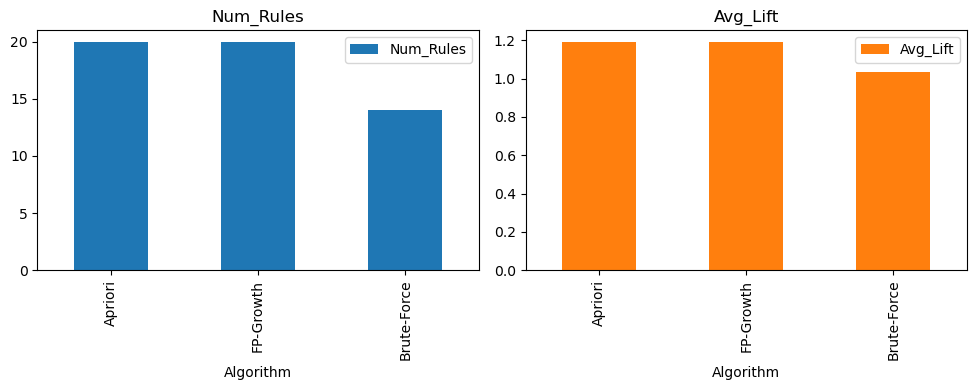

In [41]:
# Generate rules with all 3 algorithms
def compare_rules_simple(df_encoded, min_support=0.02):
    # Apriori
    apriori_rules = association_rules(
        apriori(df_encoded, min_support=min_support, use_colnames=True),
        metric="lift", min_threshold=1.0
    )
    
    # FP-Growth
    fpgrowth_rules = association_rules(
        fpgrowth(df_encoded, min_support=min_support, use_colnames=True),
        metric="lift", min_threshold=1.0
    )
    
    # Brute-Force (simple 2-item rules)
    items = df_encoded.columns
    brute_rules = []
    for a, b in combinations(items, 2):
        sup = ((df_encoded[a] & df_encoded[b]).mean())
        if sup >= min_support:
            conf_ab = (df_encoded[a] & df_encoded[b]).mean() / df_encoded[a].mean()
            lift = conf_ab / df_encoded[b].mean()
            brute_rules.append({'rule': f"{a} → {b}", 'support': sup, 'lift': lift})
    
    # Create comparison DataFrame
    comparison = pd.DataFrame({
        'Algorithm': ['Apriori', 'FP-Growth', 'Brute-Force'],
        'Num_Rules': [len(apriori_rules), len(fpgrowth_rules), len(brute_rules)],
        'Avg_Lift': [
            apriori_rules['lift'].mean(),
            fpgrowth_rules['lift'].mean(),
            pd.DataFrame(brute_rules)['lift'].mean()
        ]
    })
    
    return comparison

# Run comparison
results = compare_rules_simple(df_encoded)
print(results)

# Simple visualization
results.plot(x='Algorithm', y=['Num_Rules', 'Avg_Lift'], 
            kind='bar', subplots=True, layout=(1,2), figsize=(10,4))
plt.tight_layout()
plt.show()